In [1]:
import starepandas
import sqlalchemy
import geopandas
import pystare
import matplotlib.pyplot as plt
import glob

# Making Catalogues

## CLDMSK NOAA20

In [2]:
path = '/tablespace/caribbean/CLDMSK_L2_VIIRS_NOAA20/'
granule_trunk = 'CLDMSK_L2_VIIRS'

catalogue_cldmsk_noaa20 = starepandas.folder2catalogue(path=path, 
                                                       granule_trunk=granule_trunk,
                                                       granule_extension='nc')

## VJ103DNB

In [3]:
path = '/tablespace/caribbean/VJ103DNB/'
granule_trunk = 'VJ103DNB'

catalogue_vj103 = starepandas.folder2catalogue(path=path, 
                                               granule_trunk=granule_trunk,
                                               granule_extension='nc')

## VJ102DNB 

In [4]:
path = '/tablespace/caribbean/VJ102DNB/'
granule_trunk = 'VJ102DNB'
granule_extension = 'nc'

term = '{path}/{granule_trunk}*[!_stare].{ext}'
term = term.format(path=path, granule_trunk=granule_trunk, ext=granule_extension)
granule_paths = glob.glob(term)

catalogue_vj102 = starepandas.STAREDataFrame()
for granule_path in granule_paths:    
    vnp02 = starepandas.io.file.VNP02DNB(vnp02_path=granule_path,
                                         vnp03_folder='/tablespace/caribbean/VJ103DNB/')
    vnp02.read_sidecar_cover()
    vnp02.read_timestamps()    
    
    row = {}
    row['granule_path'] = granule_path
    row['companion_path'] = vnp02.vnp03.file_path
    row['sidecar_path'] = vnp02.sidecar_path
    row['stare_cover'] = vnp02.stare_cover
    row['begining'] = vnp02.ts_start
    row['ending'] = vnp02.ts_end
    
    catalogue_vj102 = catalogue_vj102.append(row, ignore_index=True)

catalogue_vj102 = starepandas.STAREDataFrame(catalogue_vj102, stare='stare_cover')
catalogue_vj102.head()

,begining,companion_path,ending,granule_path,sidecar_path,stare_cover
0,2018-06-01T09:18:00.000Z,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20181...,2018-06-01T09:24:00.000Z,/tablespace/caribbean/VJ102DNB/VJ102DNB.A20181...,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20181...,"[3440750115311058947, 3449757314565799939, 336..."
1,2019-01-28T05:42:00.000Z,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20190...,2019-01-28T05:48:00.000Z,/tablespace/caribbean/VJ102DNB/VJ102DNB.A20190...,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20190...,"[2756202971950743555, 2485986994308513796, 248..."
2,2019-10-04T06:12:00.000Z,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20192...,2019-10-04T06:18:00.000Z,/tablespace/caribbean/VJ102DNB/VJ102DNB.A20192...,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20192...,"[2485986994308513795, 3098476543630901251, 249..."
3,2020-03-02T06:00:00.000Z,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20200...,2020-03-02T06:06:00.000Z,/tablespace/caribbean/VJ102DNB/VJ102DNB.A20200...,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20200...,"[2485986994308513795, 2513008592072736771, 249..."
4,2019-12-30T09:06:00.000Z,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20193...,2019-12-30T09:12:00.000Z,/tablespace/caribbean/VJ102DNB/VJ102DNB.A20193...,/tablespace/caribbean/VJ103DNB/VJ103DNB.A20193...,"[2972375754064527363, 2927339757790822404, 295..."


## Visualize

<AxesSubplot:>

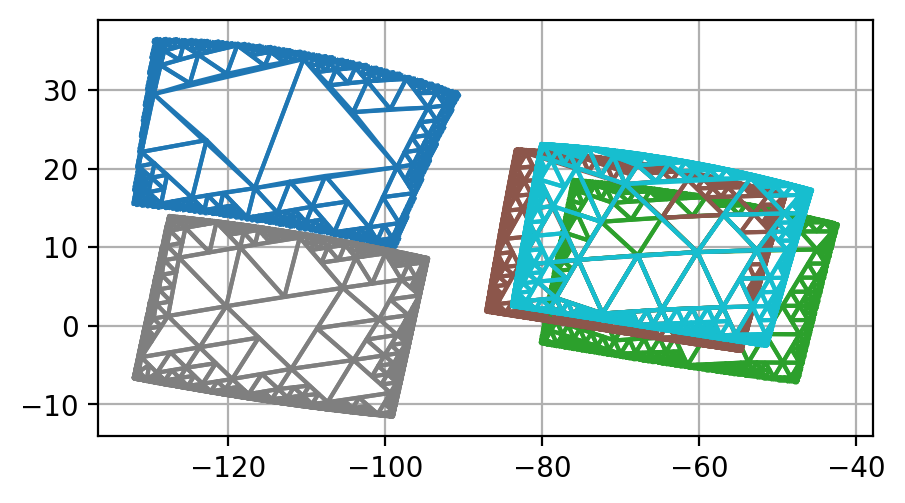

In [5]:
fig, ax = plt.subplots(figsize=(5,5), dpi=200)
ax.grid(True)

catalogue_vj102[0:5].set_trixels(inplace=False).plot(ax=ax, trixels=True, column='granule_path')

## Saving to database

In [6]:
db_path = 'catalogue.sqlite' 
uri = 'sqlite:///{db_path}'.format(db_path=db_path)
engine = sqlalchemy.create_engine(uri)

In [7]:
catalogue_cldmsk_noaa20.to_sql(name='cldmsk_noaa_20', con=engine, if_exists='replace', index=False)

In [8]:
catalogue_vj103.to_sql(name='vj103', con=engine, if_exists='replace', index=False)

In [9]:
catalogue_vj102.to_sql(name='vj102', con=engine, if_exists='replace', index=False)